# Notebook 2a – Global Exploratory Data Analysis (EDA)

## 0. Load processed data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up environment
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Define project root and data path
current_dir = Path().resolve()
root = current_dir.parents[1]  # From 'app/notebooks/' to 'GridSense/'

data_dir = root / 'data' / 'processed'

# Load merged dataset (Parquet only)
df = pd.read_parquet(data_dir / 'merged_openmeteo_pvgis.parquet')

print("✅ Merged dataset loaded. Shape:", df.shape)



✅ Merged dataset loaded. Shape: (7293312, 11)


## 1. Define features and target

In [3]:
target = 'global_irradiance_W_m2'

features = [
    'temperature_2m',
    'cloudcover',
    'windspeed_10m',
    'winddirection_10m',
    'shortwave_radiation',
    'direct_radiation',
    'diffuse_radiation',
    'cloud_cover'
]

X = df[features]
y = df[target]


## 2. Summary statistics

In [4]:
df.describe()

,time,temperature_2m,cloudcover,windspeed_10m,winddirection_10m,shortwave_radiation,direct_radiation,diffuse_radiation,cloud_cover,global_irradiance_W_m2
count,7293312,7.293312e+06,7.293312e+06,7.293312e+06,7.293312e+06,7.293312e+06,7.293312e+06,7.293312e+06,7.293312e+06,7.293312e+06
mean,2012-12-31 23:30:00.000013056,1.524306e+01,4.642821e+01,1.093007e+01,1.858246e+02,1.939037e+02,1.380208e+02,5.588296e+01,4.642821e+01,2.238976e+02
min,2005-01-01 00:00:00,-2.170000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008-12-31 23:45:00,9.500000e+00,3.000000e+00,6.000000e+00,8.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,2012-12-31 23:30:00,1.500000e+01,4.200000e+01,9.400000e+00,2.010000e+02,9.000000e+00,1.000000e+00,7.000000e+00,4.200000e+01,0.000000e+00
75%,2016-12-31 23:15:00,2.070000e+01,9.100000e+01,1.460000e+01,2.790000e+02,3.520000e+02,2.170000e+02,1.020000e+02,9.100000e+01,4.029600e+02
max,2020-12-31 23:00:00,4.510000e+01,1.000000e+02,7.270000e+01,3.600000e+02,1.055000e+03,9.550000e+02,4.920000e+02,1.000000e+02,1.181800e+03
std,NaN,7.918025e+00,3.980330e+01,6.675734e+00,1.076692e+02,2.730223e+02,2.194506e+02,7.384411e+01,3.980330e+01,3.263973e+02


## 3. Missing values analysis

In [5]:
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

time                      0
temperature_2m            0
cloudcover                0
windspeed_10m             0
winddirection_10m         0
shortwave_radiation       0
direct_radiation          0
diffuse_radiation         0
cloud_cover               0
city                      0
global_irradiance_W_m2    0
dtype: int64


## 4. Distributions of key variables

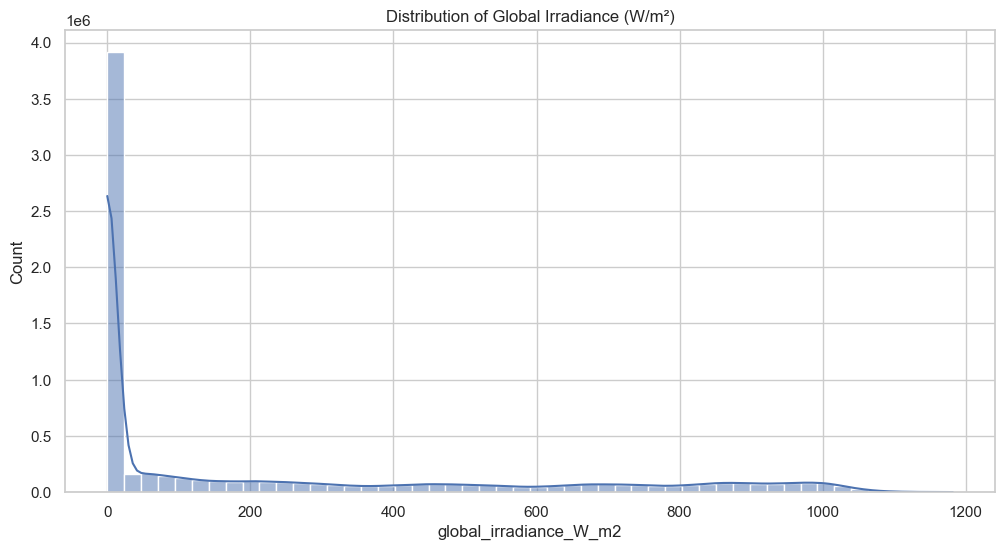

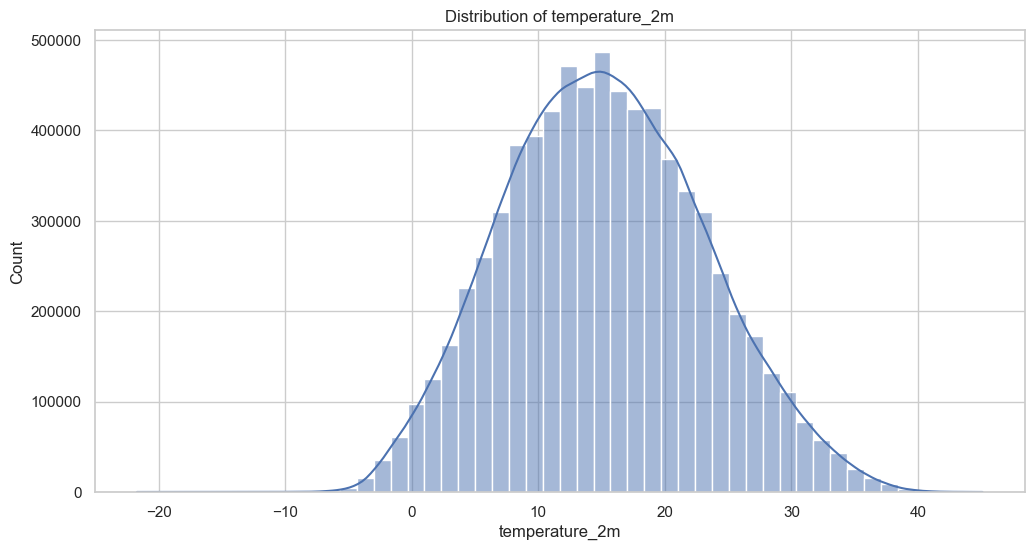

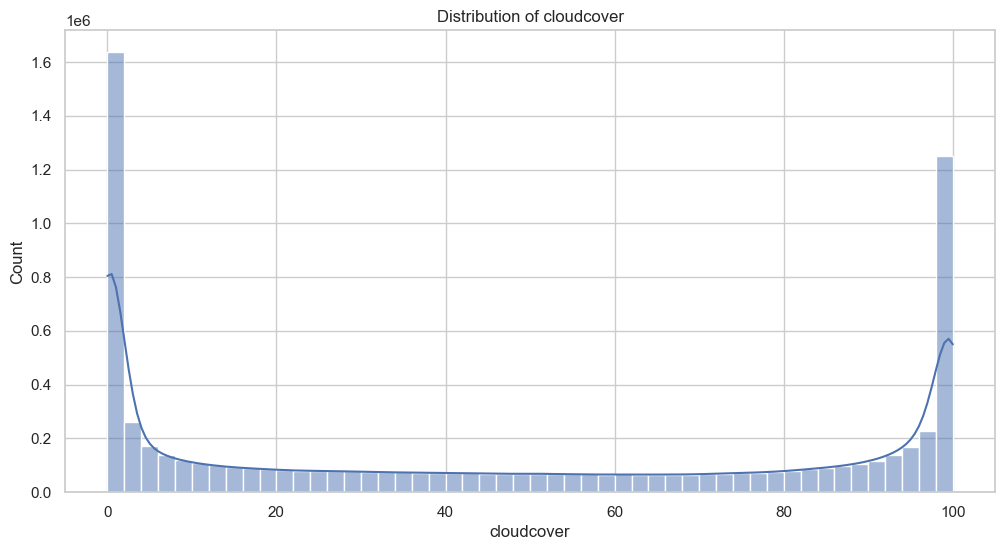

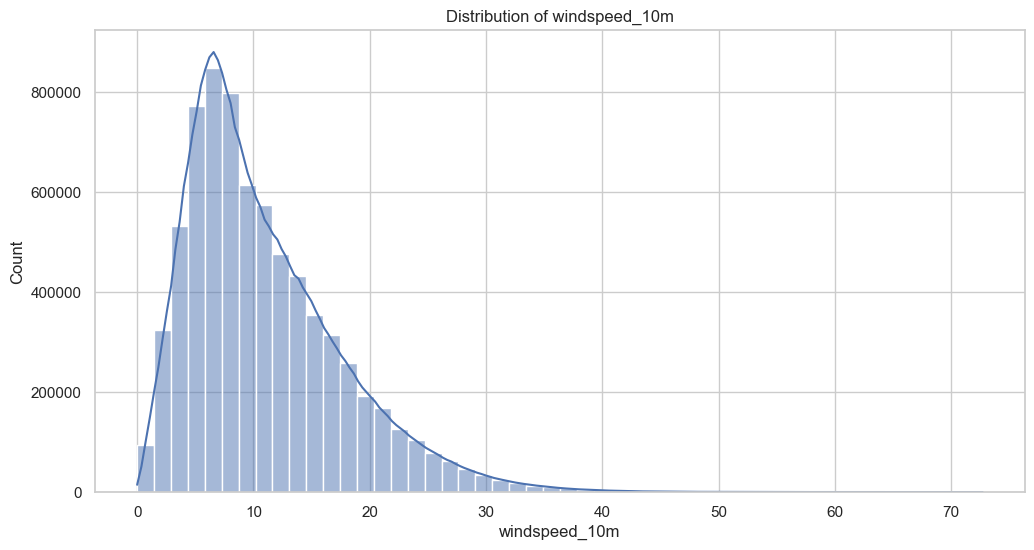

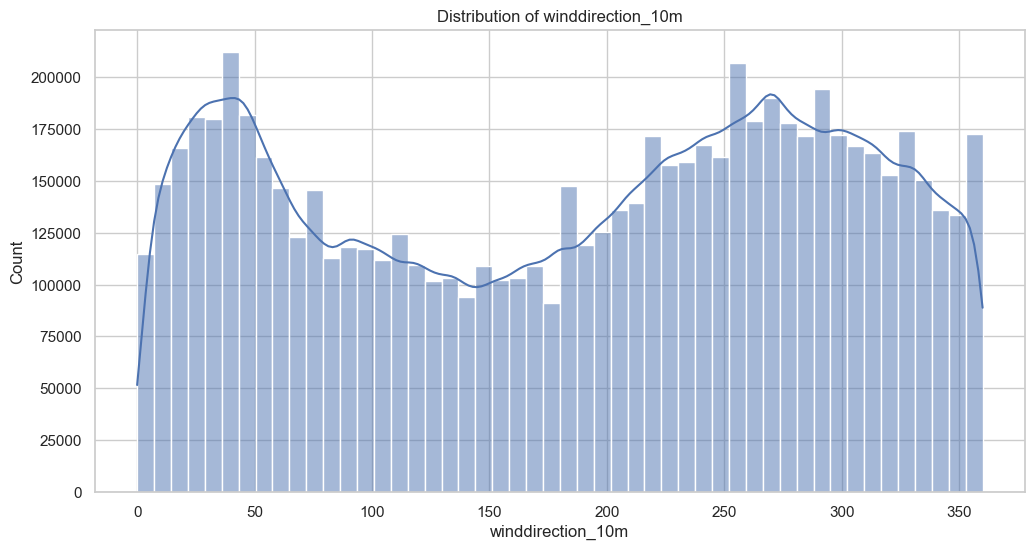

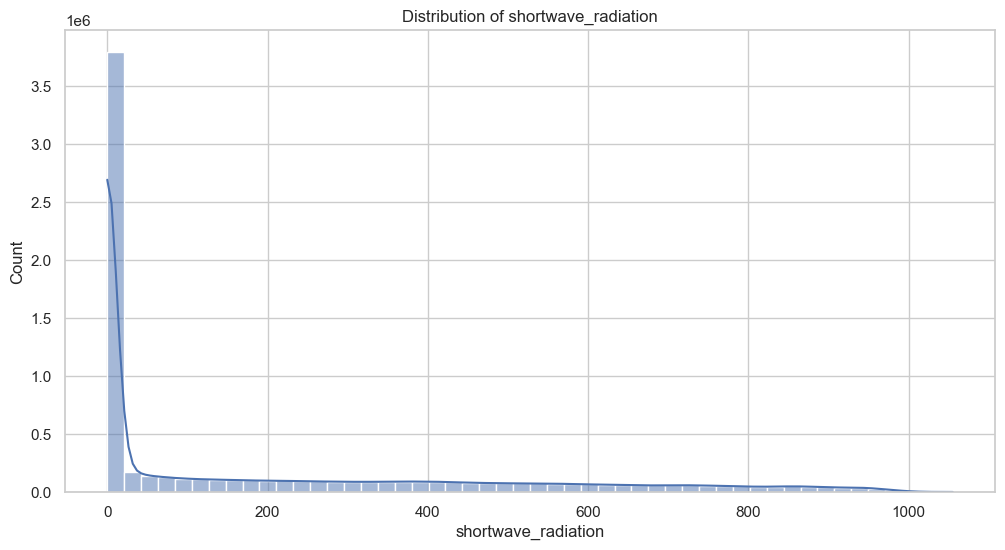

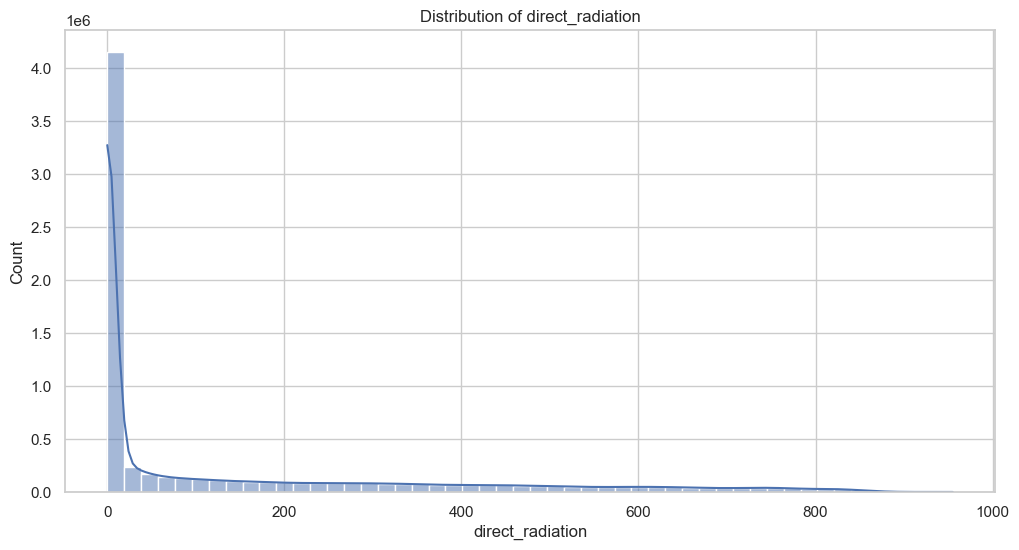

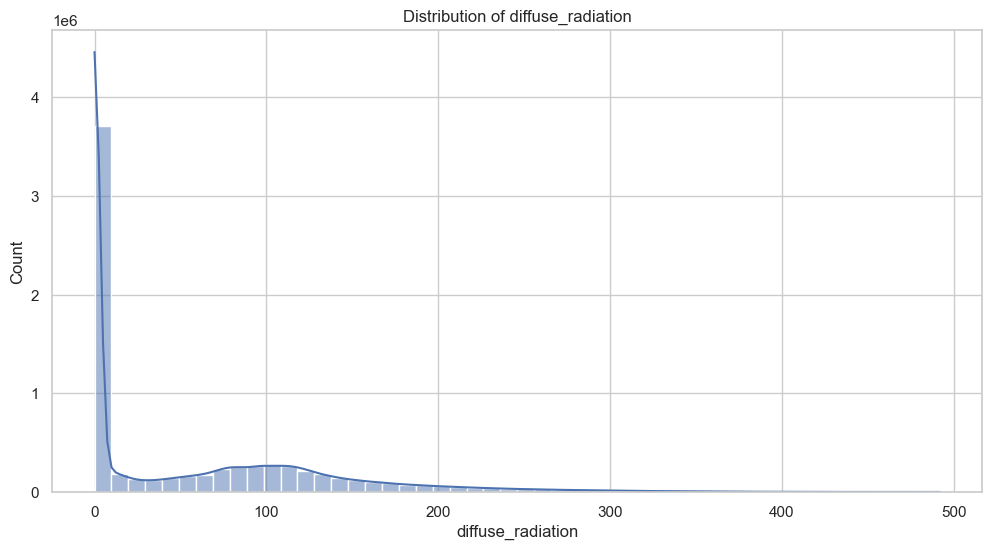

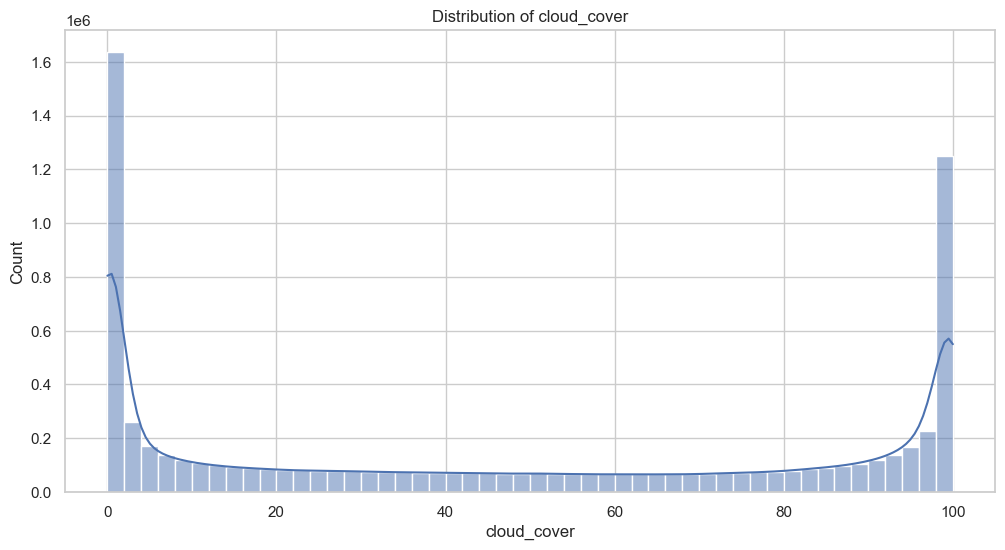

In [9]:
# Target distribution:
sns.histplot(df[target], bins=50, kde=True)
plt.title("Distribution of Global Irradiance (W/m²)")
plt.show()
# Features distributions:
for feature in features:
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


## 5. Correlation analysis

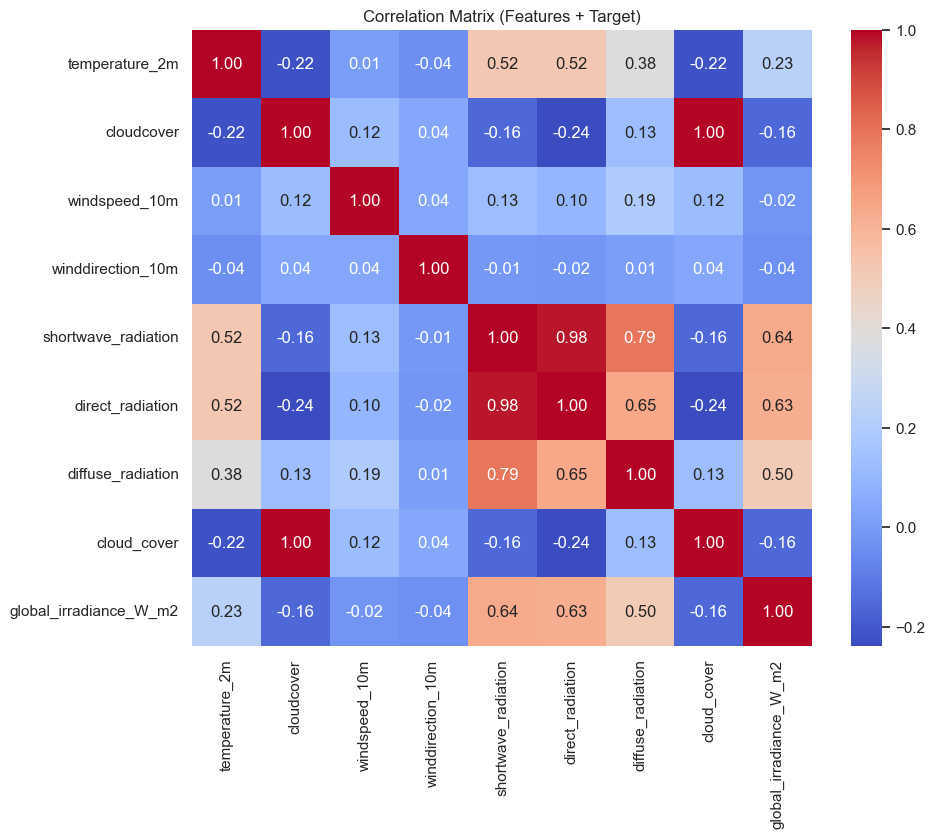

In [10]:
corr = df[features + [target]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Features + Target)")
plt.show()


## 6. Seasonality and temporal patterns

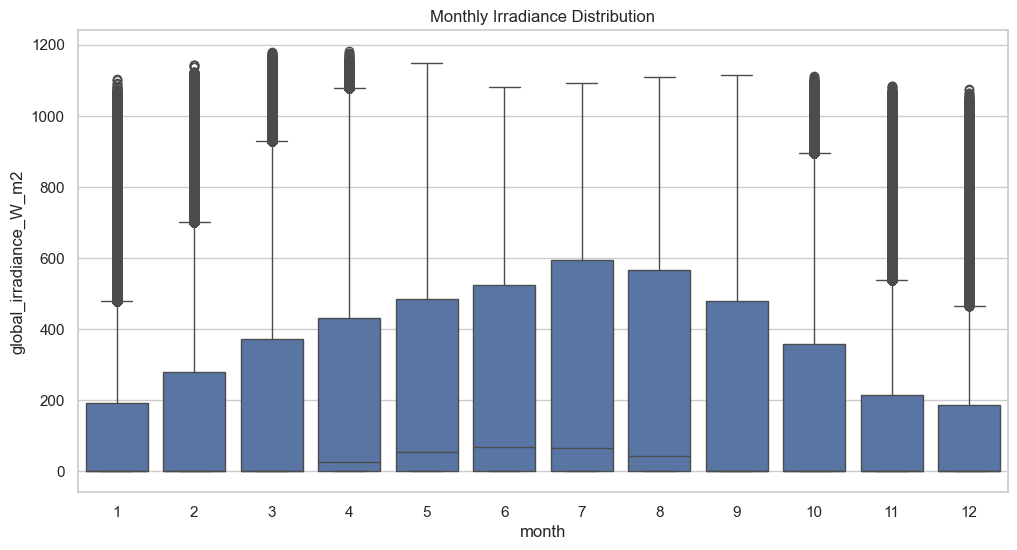

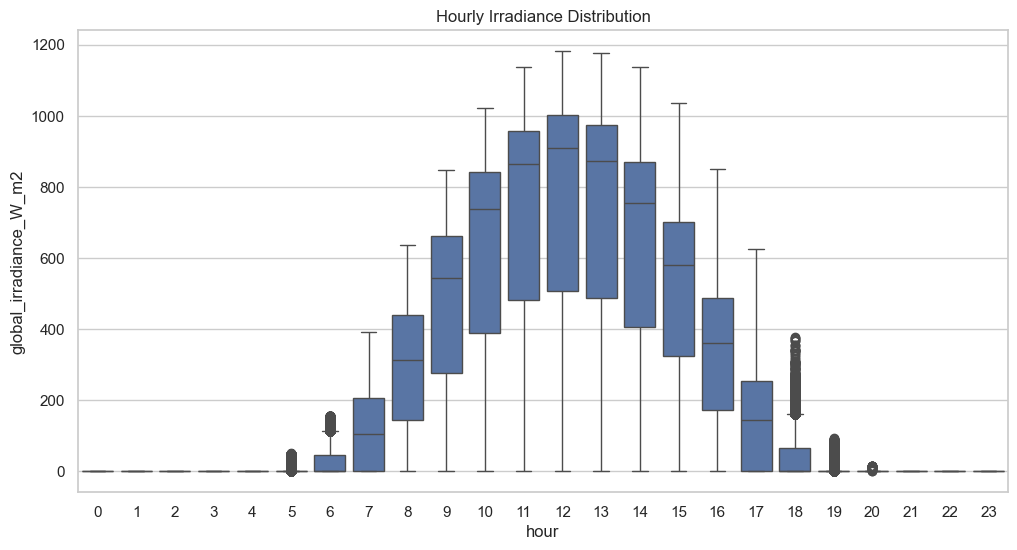

In [ ]:
# Add month and hour for seasonality checks:
df['month'] = df['time'].dt.month
df['hour'] = df['time'].dt.hour
# Monthly seasonality (boxplot):
sns.boxplot(x='month', y=target, data=df)
plt.title("Monthly Irradiance Distribution") # Save thisone
plt.show()
# Hourly seasonality (boxplot):
sns.boxplot(x='hour', y=target, data=df)
plt.title("Hourly Irradiance Distribution")  # Save thisone
plt.show()


## 7.  Outlier detection

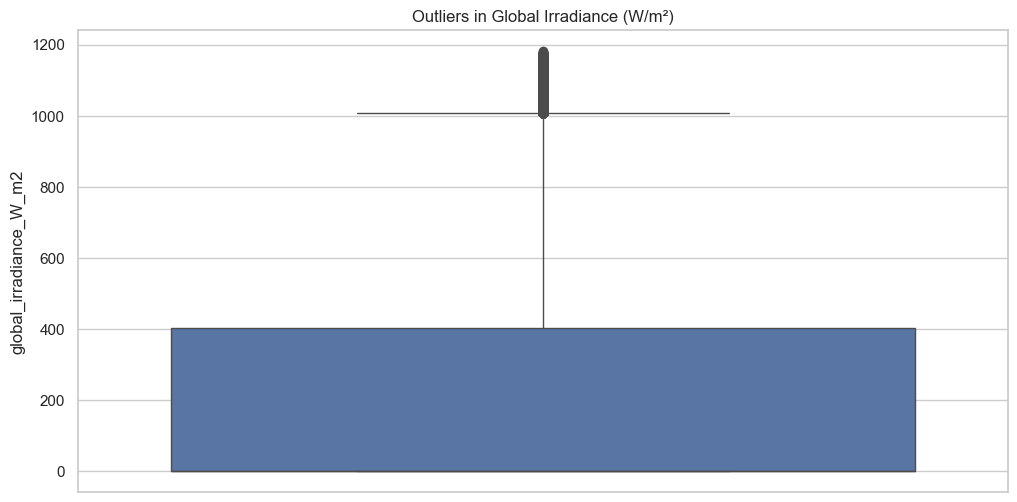

In [13]:
sns.boxplot(y=df[target])
plt.title("Outliers in Global Irradiance (W/m²)")
plt.show()


## 8. Save EDA summary 

✅ EDA visualizations saved in output/eda/


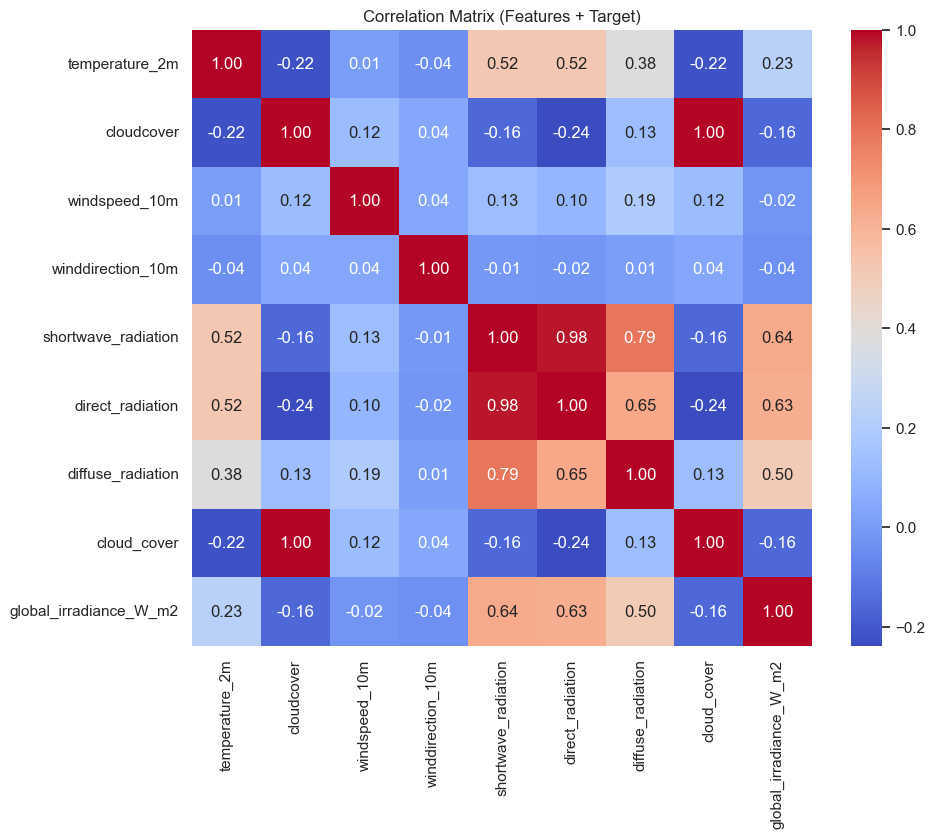

In [14]:
output_dir = root / 'output' / 'eda'
output_dir.mkdir(parents=True, exist_ok=True)

# Save correlation matrix as image
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Features + Target)")
plt.savefig(output_dir / 'correlation_matrix.png')

print("✅ EDA visualizations saved in output/eda/")
